In [1]:
# ruff: noqa: E402
%run _common.ipynb
%matplotlib inline

import torch
import matplotlib.pyplot as plt

from node_homotopy.dynamics import (
    LotkaVolterra,
    Lorenz3D,
    RobertsonChemReaction,
    VanderPol,
)
from node_homotopy.odesolve import odesolve

## Solve the Lotka-Volterra system

Text(0.5, 0, '$t$')

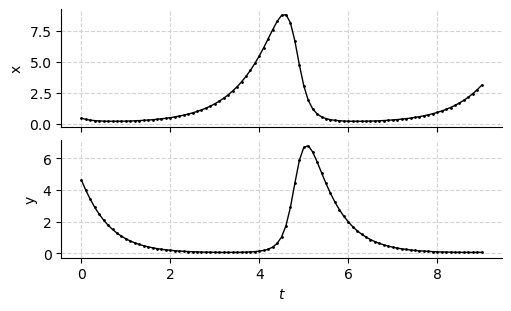

In [2]:
lotkavolterra = LotkaVolterra()
t = torch.arange(0.0, 9.1, 0.1)
u0 = torch.tensor([0.44249296, 4.6280594]).view(1, -1)
with torch.no_grad():
    u = odesolve(lotkavolterra, u0, t)

fig, axes = plt.subplots(lotkavolterra.dof, 1, sharex=True)
ylabels = ("x", "y")
for i, (ax, ylab) in enumerate(zip(axes, ylabels)):
    ax.plot(t, u[0, i], ".-", color="black")
    ax.set_ylabel(f"${ylab}$")
axes[-1].set_xlabel("$t$")

## Solve the 3D Lorenz system

Text(0.5, 0, '$t$')

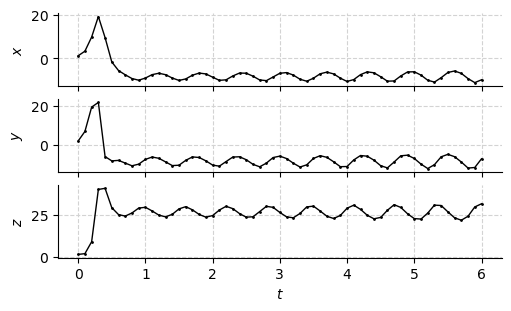

In [29]:
lorenz = Lorenz3D()
t = torch.arange(0.0, 6.1, 0.1)
u0 = torch.tensor([1.2, 2.1, 1.7]).view(1, -1)
with torch.no_grad():
    u = odesolve(lorenz, u0, t)

fig, axes = plt.subplots(
    lorenz.dof, 1, figsize=(5, 3), sharex=True, constrained_layout=True
)
ylabels = ("x", "y", "z")
for i, (ax, ylab) in enumerate(zip(axes, ylabels)):
    ax.plot(t, u[0, i], ".-", color="black")
    ax.set_ylabel(f"${ylab}$")
axes[-1].set_xlabel("$t$")

## Solve the Robertson system

As this is a stiff system, need to employ the Radau solver instead of standard dopri5, etc.

With t = 0:10:500, takes about 2 minutes

Text(0.5, 0, '$t$')

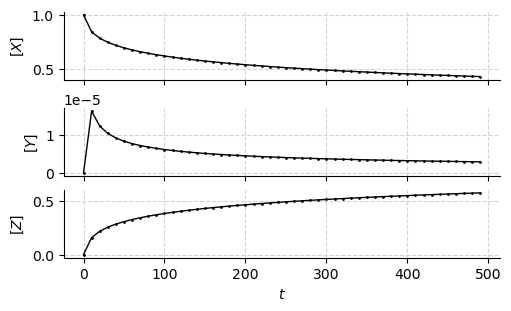

In [27]:
robertson = RobertsonChemReaction()
t = torch.arange(0.0, 500.0, 10, dtype=torch.float64)
u0 = torch.tensor([1.0, 0.0, 0.0], dtype=torch.float64).view(1, -1)
with torch.no_grad():
    u = odesolve(robertson, u0, t, method="scipy_solver", options={"solver": "Radau"})

fig, axes = plt.subplots(
    robertson.dof, 1, figsize=(5, 3), sharex=True, constrained_layout=True
)
ylabels = ("X", "Y", "Z")
for i, (ax, ylab) in enumerate(zip(axes, ylabels)):
    ax.plot(t, u[0, i], ".-", color="black")
    ax.set_ylabel(f"$[{ylab}]$")
axes[-1].set_xlabel("$t$")

## Solve the Van der Pol system

As this is a stiff system, need to employ the Radau solver instead of standard dopri5, etc.

With t = 0:3:3000, takes about 2 minutes

Text(0.5, 0, '$t$')

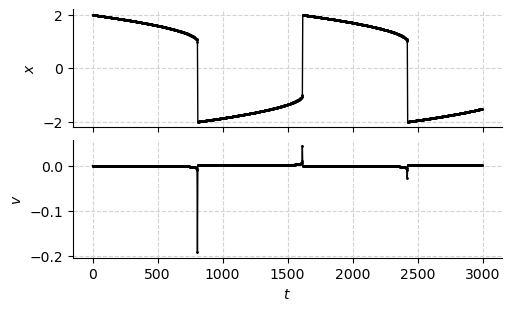

In [26]:
vanderpol = VanderPol()
t = torch.arange(0.0, 3000.0, 3.0, dtype=torch.float64)
u0 = torch.tensor([2.0, 0.0], dtype=torch.float64).view(1, -1)
with torch.no_grad():
    u = odesolve(
        vanderpol,
        u0,
        t,
        method="scipy_solver",
        rtol=1e-9,
        atol=1e-9,
        options={"solver": "Radau"},
    )

fig, axes = plt.subplots(
    vanderpol.dof, 1, figsize=(5, 3), sharex=True, constrained_layout=True
)
ylabels = ("x", "v")
for i, (ax, ylab) in enumerate(zip(axes, ylabels)):
    ax.plot(t, u[0, i], ".-", color="black")
    ax.set_ylabel(f"${ylab}$")
axes[-1].set_xlabel("$t$")